<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/introduccion_netcdf4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción a NetCDF4

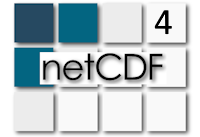

* [Web del proyecto](https://unidata.github.io/netcdf4-python/)
* [Referencia de la API](https://unidata.github.io/netcdf4-python/#header-functions)

* **¿Qué es netCDF4?** En este contexto es una intefaz Python para la librería C de NetCDFextensión de Python que permite trabajar con fichero en formato NetCDF.

* **¿Cómo se usa netCDF4?** Asignando un fichero netCDF a un objeto Python y operando con sus respectivos métodos.

* **¿Cuándo usar netCDF4?** Cuando sea preciso leer/escribir datos en formato netCDf y acceder a opciones avanzadas del formato.

* **¿Por qué netCDF4?** Porque es una interfaz directa a la librería de quienes mantienen el formato.




##Instalación

* La extensión NetCDF4 puede instalarse a través de múltiples repositorios de paquetes como `conda`

* En este notebook la instalaremos mediante `pip`


In [1]:
# Instalación de NetCDF4
# -----------------------
!pip -q install netcdf4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.2 MB/s eta 0:00:00


Adicionalmente instalaremos la extensión `Cartopy`

In [2]:
# Esta línea parece ser necesaria en Colab
# ----------------------------------------------
!pip -q install --no-binary shapely shapely --force

# Instalación de Cartopy
# ------------------------
!pip -q install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 69.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.3 MB/s eta 0:00:00


##Descarga de datos

Descargamos un fichero de datos del reanálisis ERA del ECMWF. En este caso se trata de campos de viento y temperatura en los niveles de presión de 1000, 850, 500 y 300 hPa, correspondientes a las 12:00 UTC del día 15 de cada mes de 2020.

Estos datos están disponibles gratuitamente en el portal de C3S de Copernicus: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=form



In [3]:
ifile = 'era5_pl_vt_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/yWpdSTonSFuJz6c/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_pl_vt_2020_europa_025.nc era5_2000.nc


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from era5_pl_vt_2020_europa_025.rar

Extracting  era5_pl_vt_2020_europa_025.nc                                  0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%

##Importamos las extensiones requeridas para el notebook

In [21]:
# Interfaz de acceso a datos  netCDF4
# ---------------------------------------
import netCDF4 as nc

# Extensión gráfica genérica de Python
# ------------------------------------
import matplotlib.pyplot as plt

# Extensión de cálculo con arrays
# -------------------------------
import numpy as np

In [ ]:
# Inhabilita los avisos
# --------------------------------------
import warnings
warnings.filterwarnings('ignore')

* Apertura de un fichero para el acceso a los datos

In [22]:
# Apertura de un fichero de datos NetCDF en modo lectura ('r')
# -----------------------------------------------------------
ds = nc.Dataset('/content/era5_2000.nc',   mode='r')

import netCDF4 as nc

fn = '/path/to/file.nc'
ds = nc.Dataset(fn)

print('\n --> READ GROUPS')
print(ds.groups)

print('\n --> GET GROUP')
print(ds.groups['GROUP_NAME'])

print('\n --> READ GROUPS VARIABLES')
print(ds.groups['GROUP_NAME'].variables['VARIABLE_NAME'])

print('\n --> GET VARIABLE VALUE')
print(ds.groups['GROUP_NAME'].variables['VARIABLE_NAME'][:])


A NetCDF file has three basic parts: metadata, dimensions and variables. Variables contain both metadata and data. netCDF4 allows us to access the metadata and data associated with a NetCDF file.

* Examinando el dataset ds observamos que los datos no están organizados en grupos sino que cuelgan de una misma raíz (`root_group`)


In [ ]:
# Estructura básica del fichero
# -----------------------------
ds

En efecto, el listado de nombres de grupos aparece vacío

In [26]:
ds.groups

{}

* La información sobre las variables se encuentra en un diccionario que se llama precisamente `variables`

* Listando sus claves obtenemos los nombres de las variables presentes

In [29]:
# Variables presentes en el fichero
# ---------------------------------
ds.variables.keys()

dict_keys(['longitude', 'latitude', 'level', 'time', 't', 'u', 'v'])

* Con el mismo diccionario `variables` obtenemos los metadatos de la variable t (temperatura)

* Esto permite conocer los atributos locales de la temperatura (unidades, nombre extendido, etc) así como las dimensiones de los datos

In [48]:
ds.variables['t']

<class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0017712375241022414
    add_offset: 266.2331002821169
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Temperature
    standard_name: air_temperature
unlimited dimensions: 
current shape = (12, 4, 401, 481)
filling on

* Podemos acceder exclusivamente una lista con los atributos de la variable mediante la función `ncattrs()`

In [ ]:
ds.variables['t'].ncattrs()


* Y al contenido de cada atributo a través de la función ncattrs()

In [ ]:
ds.variables['t'].getncattr('standard_name')

* De manera sencilla podemos acceder a todos los metadatos anidando dos bucles

In [ ]:
for var in ds.variables.keys() :
  print('variable: ' + var)
  for atributo in ds.variables[var].ncattrs() :
    valor = ds.variables[var].getncattr(atributo)
    print('   ' + atributo, valor)

* De manera análoga obtenemos las dimensiones de las variables

In [49]:
for var in ds.variables.keys() :
   print(var,ds.variables[var].shape)

longitude (481,)
latitude (401,)
level (4,)
time (12,)
t (12, 4, 401, 481)
u (12, 4, 401, 481)
v (12, 4, 401, 481)


* NetCDF4 permite cargar en memoria solo lo que vayamos a usar en cada momento. Eso permite trabajar con ficheros de gran tamaño en sistemas de memoria reducida.

* Para leer las variables en arrays `Numpy` indicamos los índices que queremos cargar en memoria

In [52]:
# Leemos solo 10 valores de la longitud geográfica
# -------------------------------------------------
longitud = ds.variables['longitude'][10:20]

longitud

masked_array(data=[-57.5 , -57.25, -57.  , -56.75, -56.5 , -56.25, -56.  ,
                   -55.75, -55.5 , -55.25],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

* Análogamente podemos leer, por ejemplo, solamente la temperatura de uno de los cuatro niveles verticales disponibles

* De esa manera podemos procesar en bucle ficheros muy grandes, accediendo por trozos a su contenido

In [81]:
# Niveles de presión disponibles
# -------------------------------------------------
for i in range(ds.variables['level'].size) :
   print('índice=%d presión=%d' % (i, ds.variables['level'][i]))

# Leemos solo la temperatura del nivel de 850 hPa
# -------------------------------------------------
temperatura = ds.variables['t'][:,2,:,:]

# El array de temperaturas solo tiene tres dimensiones (tiempo, latitud, longitud)
# ---------------------------------------------------------------------------------
print('\nDimensión del array de temperatura (%d,%d,%d): ' % temperatura.shape)

índice=0 presión=300
índice=1 presión=500
índice=2 presión=850
índice=3 presión=1000

Dimensión del array de temperatura (12,401,481): 


* El tiempo suele requerir un tratamiento adicional

* Si analizamos el contenido del array 'time' observamos que contiene valores numéricos

In [113]:
for i in range(ds.variables['time'].size) :
   print('índice=%d  ------>    tiempo=%s' % (i, ds.variables['time'][i]))

índice=0  ------>    tiempo=1052244
índice=1  ------>    tiempo=1052988
índice=2  ------>    tiempo=1053684
índice=3  ------>    tiempo=1054428
índice=4  ------>    tiempo=1055148
índice=5  ------>    tiempo=1055892
índice=6  ------>    tiempo=1056612
índice=7  ------>    tiempo=1057356
índice=8  ------>    tiempo=1058100
índice=9  ------>    tiempo=1058820
índice=10  ------>    tiempo=1059564
índice=11  ------>    tiempo=1060284


* En el atributo etiquetado como `units` se indica a qué corresponden esos valores

* En este caso se trata del número de horas transcurridas desde el día 1 de enero del año 1900 a las 00:00:00 UTC

In [110]:
ds.variables['time'].units

'hours since 1900-01-01 00:00:00.0'

* Para convertir el eje de tiempo en variables `datetime` de `Python` utilizamos la función `num2date` incluida en `netCDF4`

In [112]:
# Leemos el vector de tiempos
# ----------------------------
tiempo = ds.variables['time']

# Convertimos los valores en fechas de tipo datetime
# ---------------------------------------------------
fechas = nc.num2date(tiempo[:], tiempo.units)

# Inspeccionamos los valores
# --------------------------
for i in range(fechas.size) :
   print('índice=%d    ----->   tiempo=%s' % (i, fechas[i]))

índice=0    ----->   tiempo=2020-01-15 12:00:00
índice=1    ----->   tiempo=2020-02-15 12:00:00
índice=2    ----->   tiempo=2020-03-15 12:00:00
índice=3    ----->   tiempo=2020-04-15 12:00:00
índice=4    ----->   tiempo=2020-05-15 12:00:00
índice=5    ----->   tiempo=2020-06-15 12:00:00
índice=6    ----->   tiempo=2020-07-15 12:00:00
índice=7    ----->   tiempo=2020-08-15 12:00:00
índice=8    ----->   tiempo=2020-09-15 12:00:00
índice=9    ----->   tiempo=2020-10-15 12:00:00
índice=10    ----->   tiempo=2020-11-15 12:00:00
índice=11    ----->   tiempo=2020-12-15 12:00:00


* A continuación, cargamos el resto de datos en arrays Numpy y ya podemos trabajar con ellos en la manera habitual.

In [116]:
# Leemos el vector de longitudes
# -------------------------------
longitud = ds.variables['longitude'][:]

# Leemos el vector de latitudes
# -------------------------------
latitud = ds.variables['latitude'][:]

# ¿Qué unidades tiene la temperatura?
# -----------------------------------
print('Unidades de la temperatura : ',ds.variables['t'].units)

Unidades de la temperatura :  K


In [ ]:
# Leemos la matriz de temperaturas para:
#    el día 17 de julio de 2020 a las 12:00UTC (índice 6)
#    la presión de 1000 hPa (índice 3)
# Cambiamos de unidades el resultado pasando de Kelvin a grados centígrados
# ---------------------------------------------------------------------------
itime  = 6
ilevel = 3
temperatura = ds.variables['t'][itime, ilevel, :, :] - 275.15

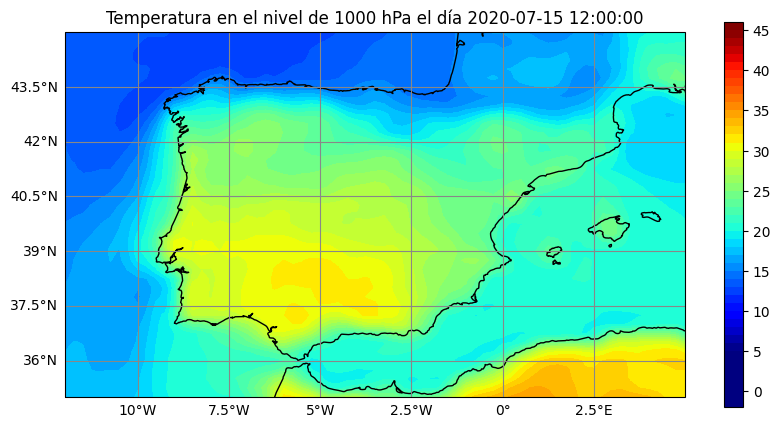

In [128]:
# Extensiones para el dibujo de mapas
# -----------------------------------
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Creamos una figura
# -------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica equirectangular
# -----------------------------------------------------------
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

# Área geográfica
# -----------------
ax.set_extent((-12,5,35,45))

# Paralelos y meridianos
# -----------------------
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False

# Línea de costa
# ----------------
ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=1)

# Mapa de temperaturas
# -----------------------
pc = ax.contourf(longitud, latitud, temperatura,
            levels = 50,
            transform=ccrs.PlateCarree(),
            cmap='jet',
            vmin=5,
            vmax=45
                 )
# Escala de color
# --------------------
cbar = fig.colorbar(pc)


# Título para el gráfico
# ---------------------------------------------------------------
ax.set_title('Temperatura en el nivel de %d hPa el día %s' % (ds.variables['level'][ilevel],fechas[itime]))


plt.show()

* Si tuviéramos limitaciones de memoria aún podríamos crear un gráfico con múltiples mapas procesando los datos en bucle

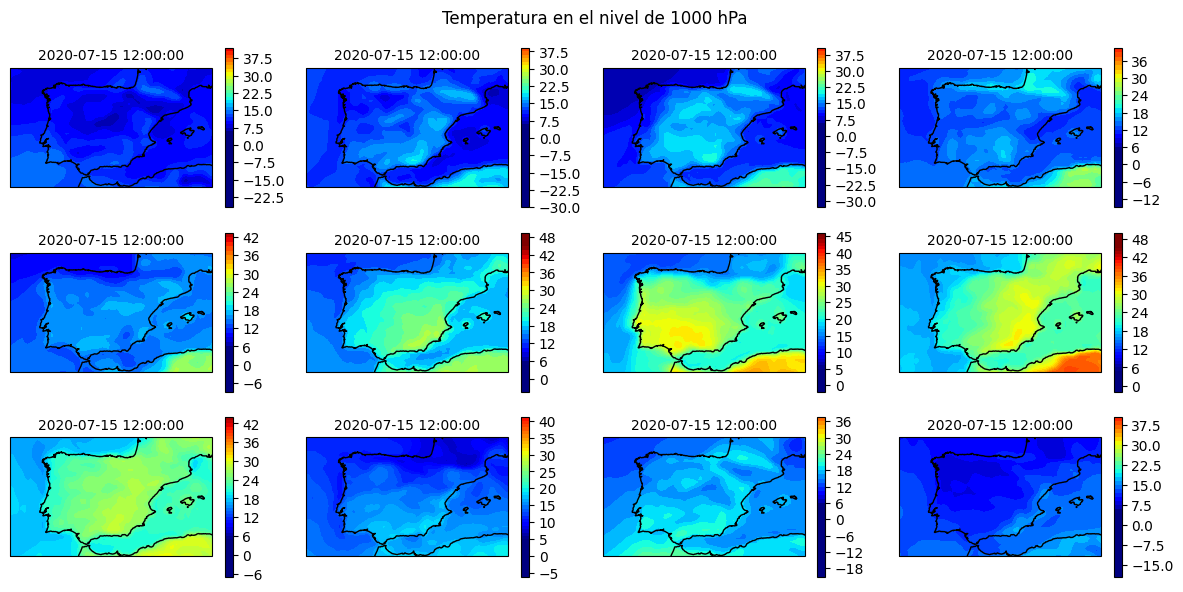

In [142]:
# Creamos una figura
# -------------------
fig = plt.figure(figsize=[12, 6])

# Añadimos un mapa con proyección ortográfica equirectangular
# -----------------------------------------------------------
ax = fig.subplots(3, 4,
                  subplot_kw={'projection' : ccrs.PlateCarree()})

k = 0

for zax in ax.flatten() :


    temperatura = ds.variables['t'][k, ilevel, :, :] - 275.15
    k += 1

    # Área geográfica
    # -----------------
    zax.set_extent((-12,5,35,45))

    # Línea de costa
    # ----------------
    zax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=1)

    # Mapa de temperaturas
    # -----------------------
    pc = zax.contourf(longitud, latitud, temperatura,
                levels = 50,
                transform=ccrs.PlateCarree(),
                cmap='jet',
                vmin=5,
                vmax=45
                    )
    # Escala de color
    # --------------------
    cbar = fig.colorbar(pc)


    # Título para el gráfico
    # ---------------------------------------------------------------
    zax.set_title(fechas[itime],size=10)

plt.suptitle('Temperatura en el nivel de %d hPa' % ds.variables['level'][ilevel])
plt.tight_layout()
plt.show()